In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import f_oneway
from scipy.stats import skew
import scipy.stats 
from scipy.special import boxcox1p
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.preprocessing import LabelEncoder

In [33]:
df1 = pd.DataFrame({'type': ['Apartment', 'Studio Apartment', 'Villa', 'Independent House', 'Penthouse']})

# Convert categorical data to numerical data using cat.codes
df1['type'] = df1['type'].astype('category')
df1['type_Codes'] = df1['type'].cat.codes

# View the converted DataFrame
print(df1)

                type  type_Codes
0          Apartment           0
1   Studio Apartment           3
2              Villa           4
3  Independent House           1
4          Penthouse           2


In [34]:
df1 = pd.read_csv("Mumbai House Prices.csv")
df1.head()


,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [35]:
df1.shape

(76038, 9)

In [36]:
df1.describe()


,bhk,area,price
count,76038.000000,76038.000000,76038.00000
mean,2.015111,1024.536850,29.38227
std,0.922754,670.276165,32.90345
min,1.000000,127.000000,1.00000
25%,1.000000,640.000000,1.75000
50%,2.000000,872.000000,5.50000
75%,3.000000,1179.000000,59.00000
max,10.000000,16000.000000,99.99000


In [37]:
df1['region'].value_counts()

Thane West         14868
Mira Road East      9902
Dombivali           3041
Kandivali East      2568
Kharghar            2362
                   ...  
Police Colony          1
GTB Nagar              1
Bandra                 1
Sector 14 Vashi        1
Goregaon               1
Name: region, Length: 228, dtype: int64

In [38]:
df1['type'].value_counts()

Apartment            74854
Studio Apartment       882
Villa                  226
Independent House       73
Penthouse                3
Name: type, dtype: int64

In [39]:
df1['age'].value_counts()

New        38072
Resale     23357
Unknown    14609
Name: age, dtype: int64

In [40]:
df1.isnull().sum()

bhk           0
type          0
locality      0
area          0
price         0
price_unit    0
region        0
status        0
age           0
dtype: int64

In [41]:
df1['status'].unique()

array(['Ready to move', 'Under Construction'], dtype=object)

In [42]:
df2 = df1.drop(['age', 'locality', 'status'], axis=1)
df2.head()

,bhk,type,area,price,price_unit,region
0,3,Apartment,685,2.50,Cr,Andheri West
1,2,Apartment,640,52.51,L,Naigaon East
2,2,Apartment,610,1.73,Cr,Borivali West
3,2,Apartment,876,59.98,L,Panvel
4,2,Apartment,659,94.11,L,Mira Road East


In [43]:
df2['bhk'].unique()

array([ 3,  2,  5,  1,  4,  6,  9,  8, 10,  7], dtype=int64)

In [44]:
conversion_factor_crore_to_lakh = 100  # 1 Crore = 100 Lakhs

def convert_to_lakhs(row):
    if row["price_unit"] == "L":
        return row["price"]
    elif row["price_unit"] == "Cr":
        return row["price"] * conversion_factor_crore_to_lakh

df2["price_lakhs"] = df2.apply(convert_to_lakhs, axis=1)

df3 = df2.drop(['price','type', 'price_unit'], axis=1)
df3.head()

,bhk,area,region,price_lakhs
0,3,685,Andheri West,250.00
1,2,640,Naigaon East,52.51
2,2,610,Borivali West,173.00
3,2,876,Panvel,59.98
4,2,659,Mira Road East,94.11


C:\Users\Smdas\AppData\Local\Temp\ipykernel_6584\259957056.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df3['price_lakhs'])


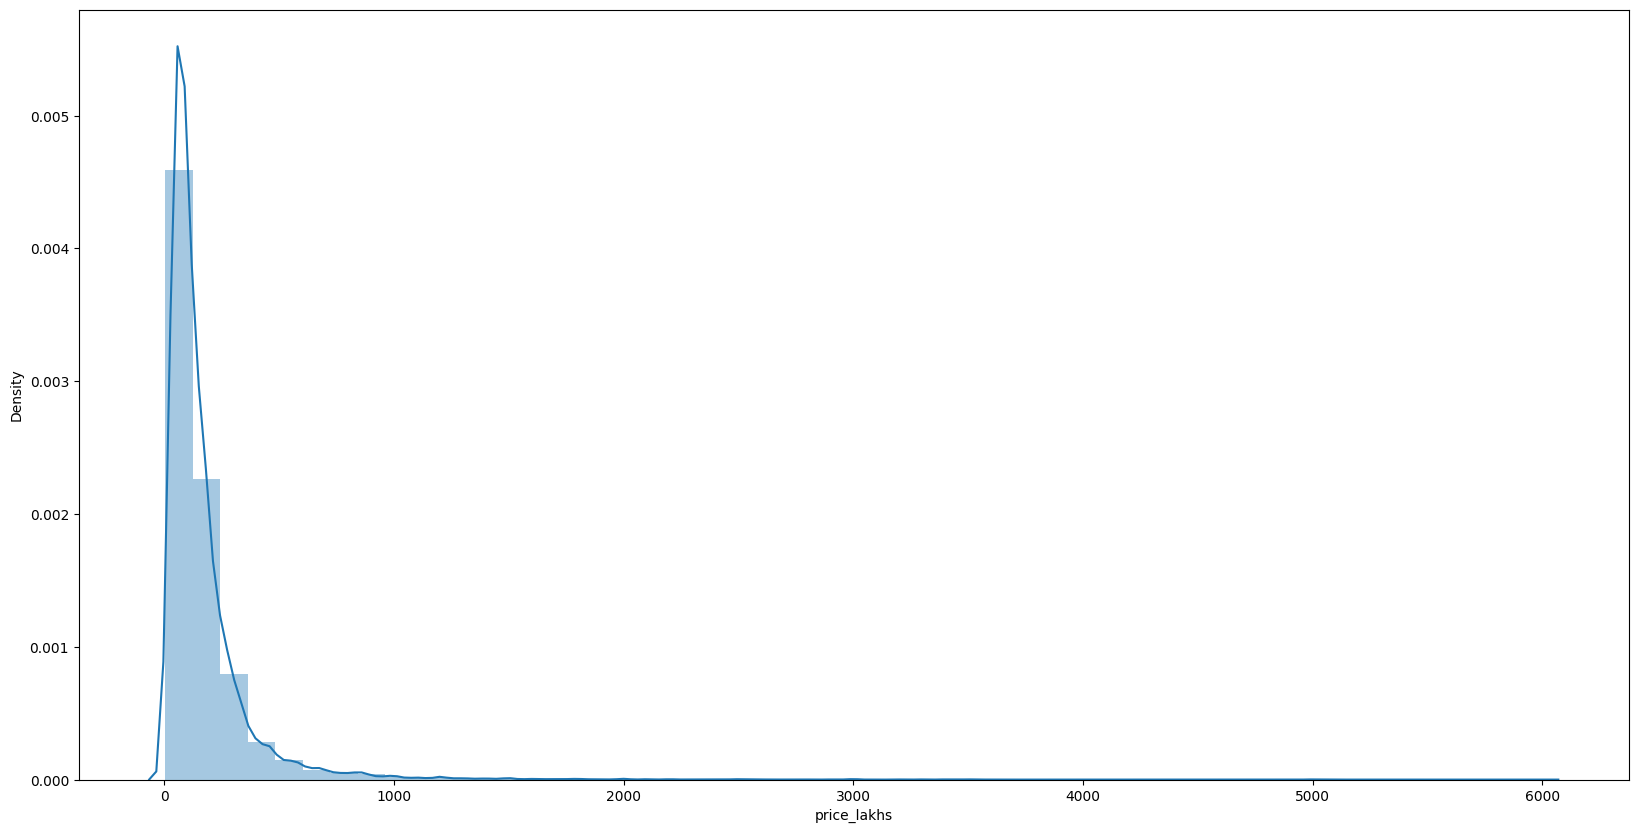

In [45]:
ax = sns.distplot(df3['price_lakhs'])

In [46]:
log_transform_y =  np.log(df3['price_lakhs'])

C:\Users\Smdas\AppData\Local\Temp\ipykernel_6584\956796254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(log_transform_y)


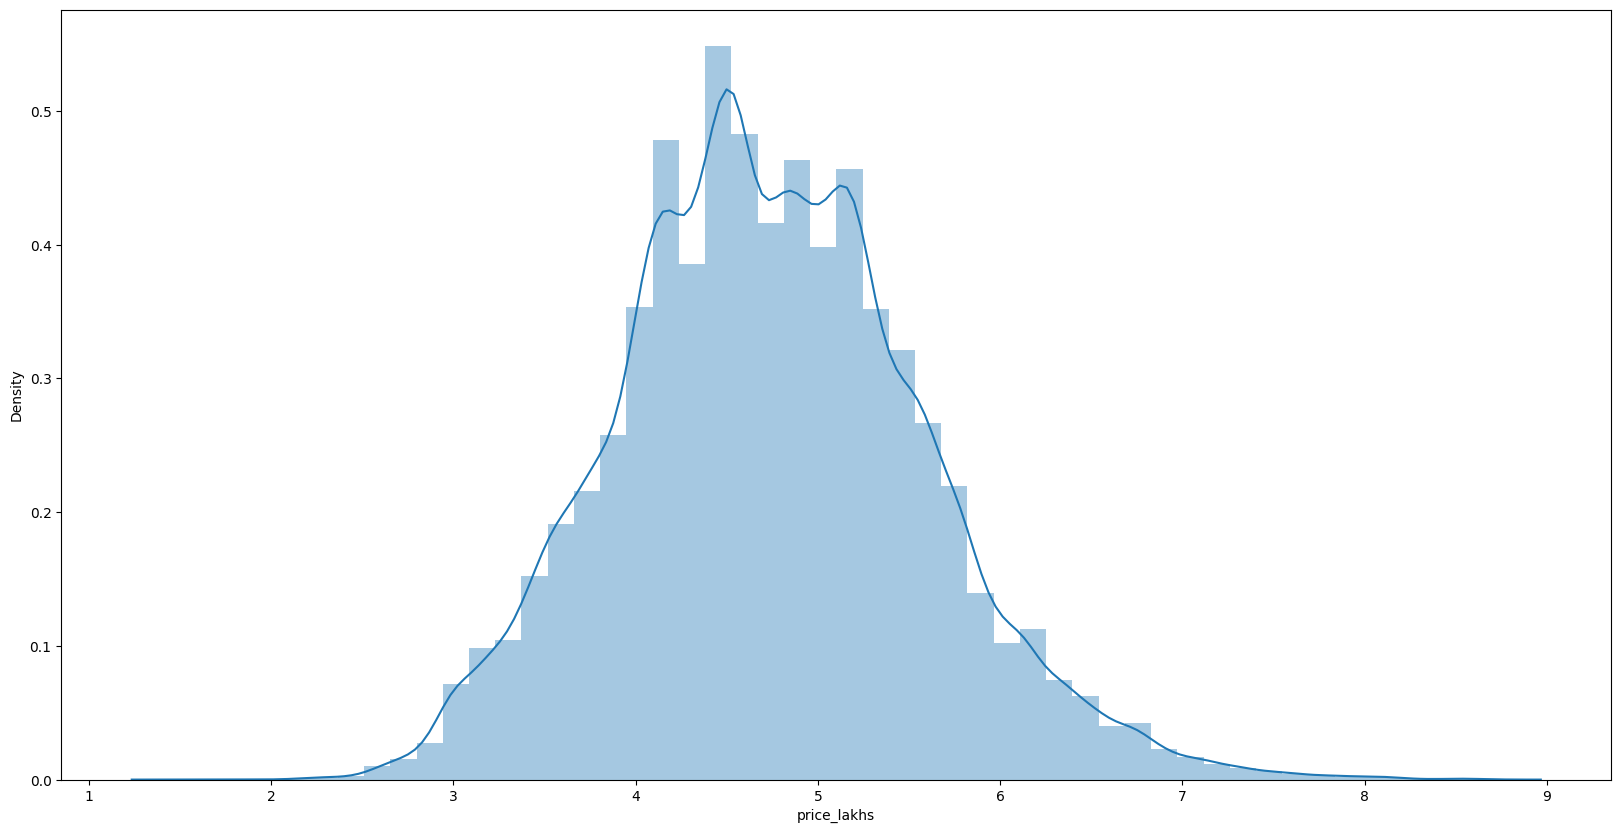

In [47]:
ax = sns.distplot(log_transform_y)

In [48]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price_lakhs']/df4['area']
df4.head()

,bhk,area,region,price_lakhs,price_per_sqft
0,3,685,Andheri West,250.00,0.364964
1,2,640,Naigaon East,52.51,0.082047
2,2,610,Borivali West,173.00,0.283607
3,2,876,Panvel,59.98,0.068470
4,2,659,Mira Road East,94.11,0.142807


In [49]:
df4['price_per_sqft'].describe()

count    76038.000000
mean         0.151188
std          0.093329
min          0.006468
25%          0.085714
50%          0.130000
75%          0.194961
max          1.823077
Name: price_per_sqft, dtype: float64

In [50]:
numerical_features = df4[['bhk', 'area', 'price_lakhs', 'price_per_sqft']]
categorical_features = df4.select_dtypes(include=['object'])

In [51]:
scaler = StandardScaler()

standardized_features = scaler.fit_transform(numerical_features)

df4 = pd.DataFrame(standardized_features, columns=numerical_features.columns)
df4.head()

,bhk,area,price_lakhs,price_per_sqft
0,1.067343,-0.506566,0.374808,2.290572
1,-0.016376,-0.573703,-0.532508,-0.740838
2,-0.016376,-0.618461,0.021052,1.418844
3,-0.016376,-0.221607,-0.498189,-0.886309
4,-0.016376,-0.545356,-0.341387,-0.089799


In [52]:
# Exclude non-numeric columns and compute the correlation matrix
numeric_df4 = df4.select_dtypes(include=[np.number])
correlation_matrix = numeric_df4.corr()
print(df4.head())
print(df4.dtypes)

        bhk      area  price_lakhs  price_per_sqft
0  1.067343 -0.506566     0.374808        2.290572
1 -0.016376 -0.573703    -0.532508       -0.740838
2 -0.016376 -0.618461     0.021052        1.418844
3 -0.016376 -0.221607    -0.498189       -0.886309
4 -0.016376 -0.545356    -0.341387       -0.089799
bhk               float64
area              float64
price_lakhs       float64
price_per_sqft    float64
dtype: object


In [53]:
df4.corr()

,bhk,area,price_lakhs,price_per_sqft
bhk,1.000000,0.787738,0.631353,0.362950
area,0.787738,1.000000,0.756000,0.216128
price_lakhs,0.631353,0.756000,1.000000,0.664473
price_per_sqft,0.362950,0.216128,0.664473,1.000000


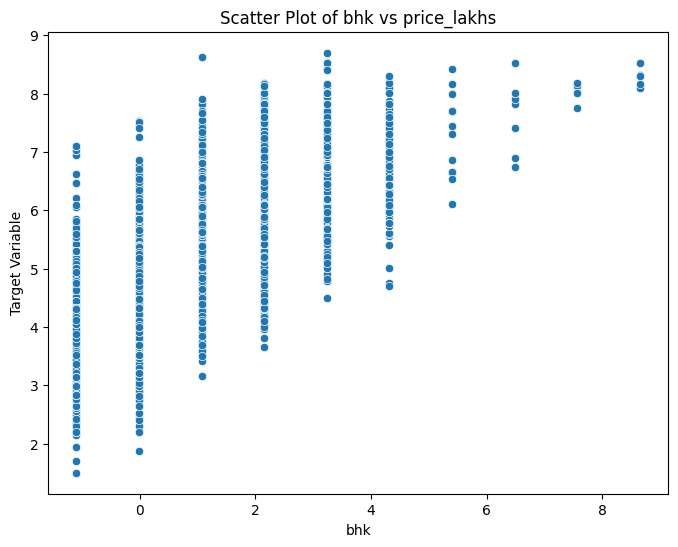

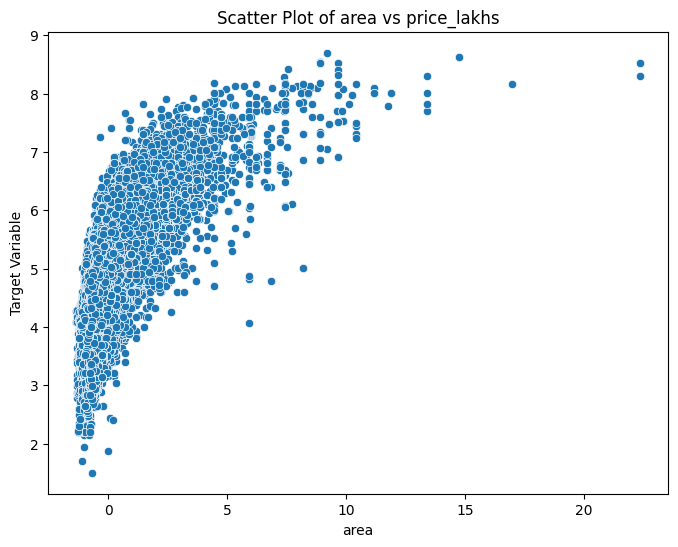

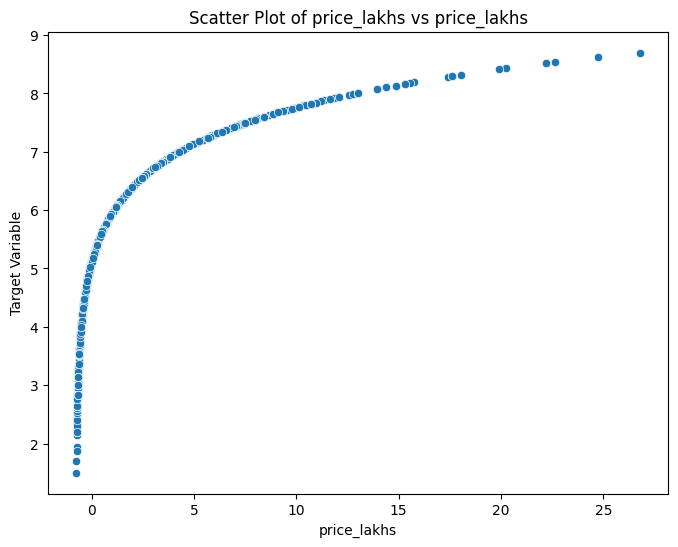

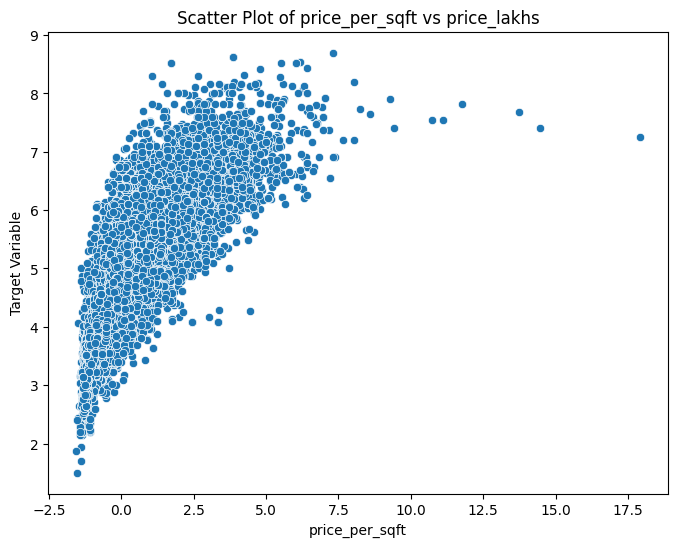

In [54]:
for feature in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df4, x=feature, y=log_transform_y)
    plt.title(f'Scatter Plot of {feature} vs price_lakhs')
    plt.xlabel(feature)
    plt.ylabel('Target Variable')
    plt.show()

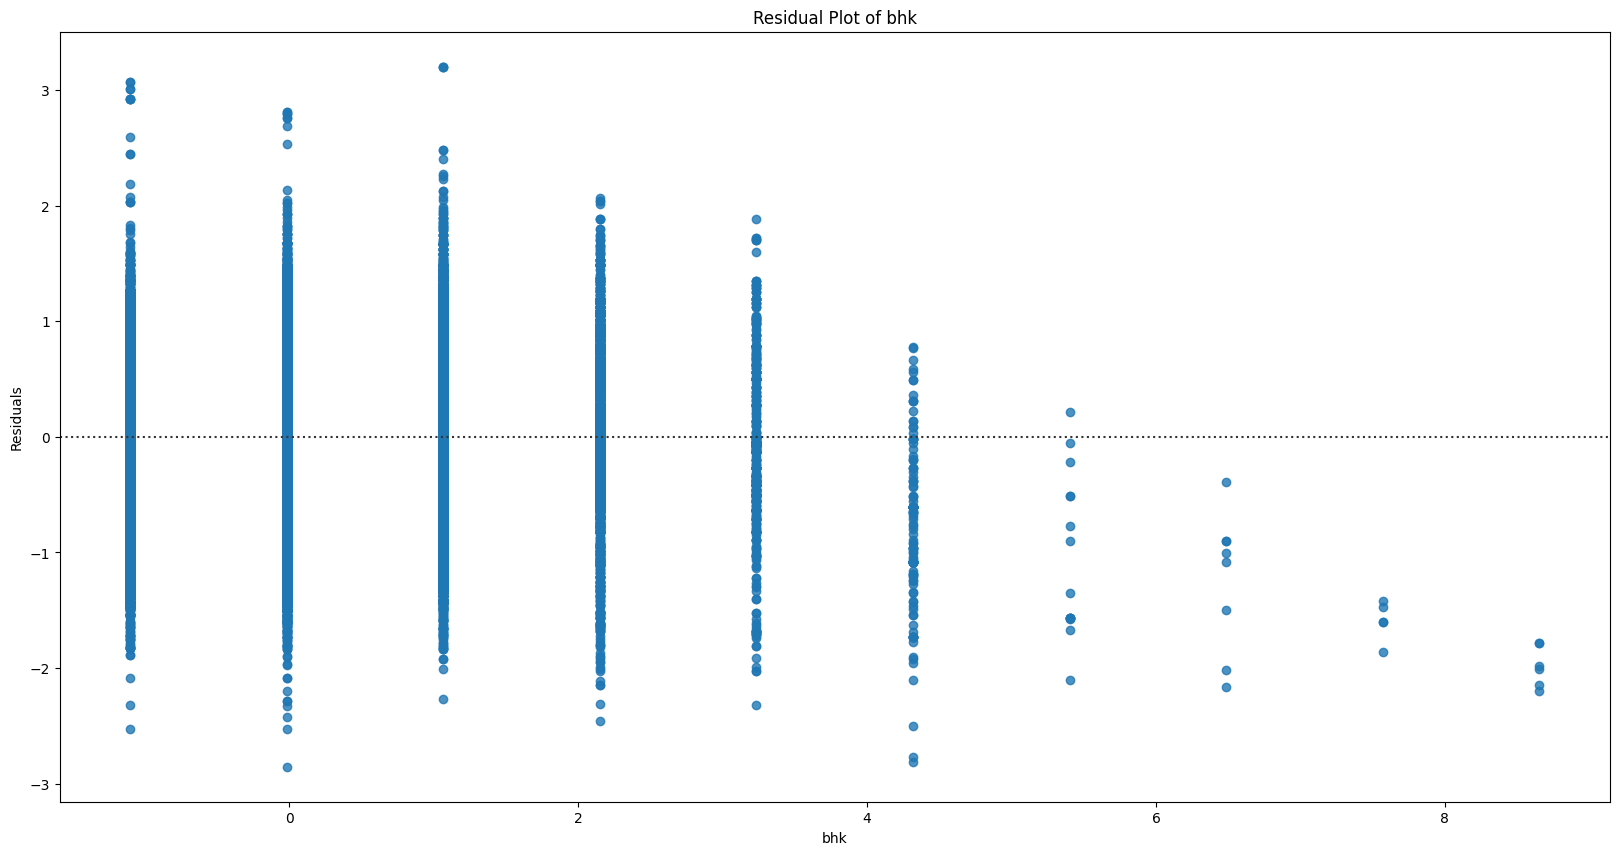

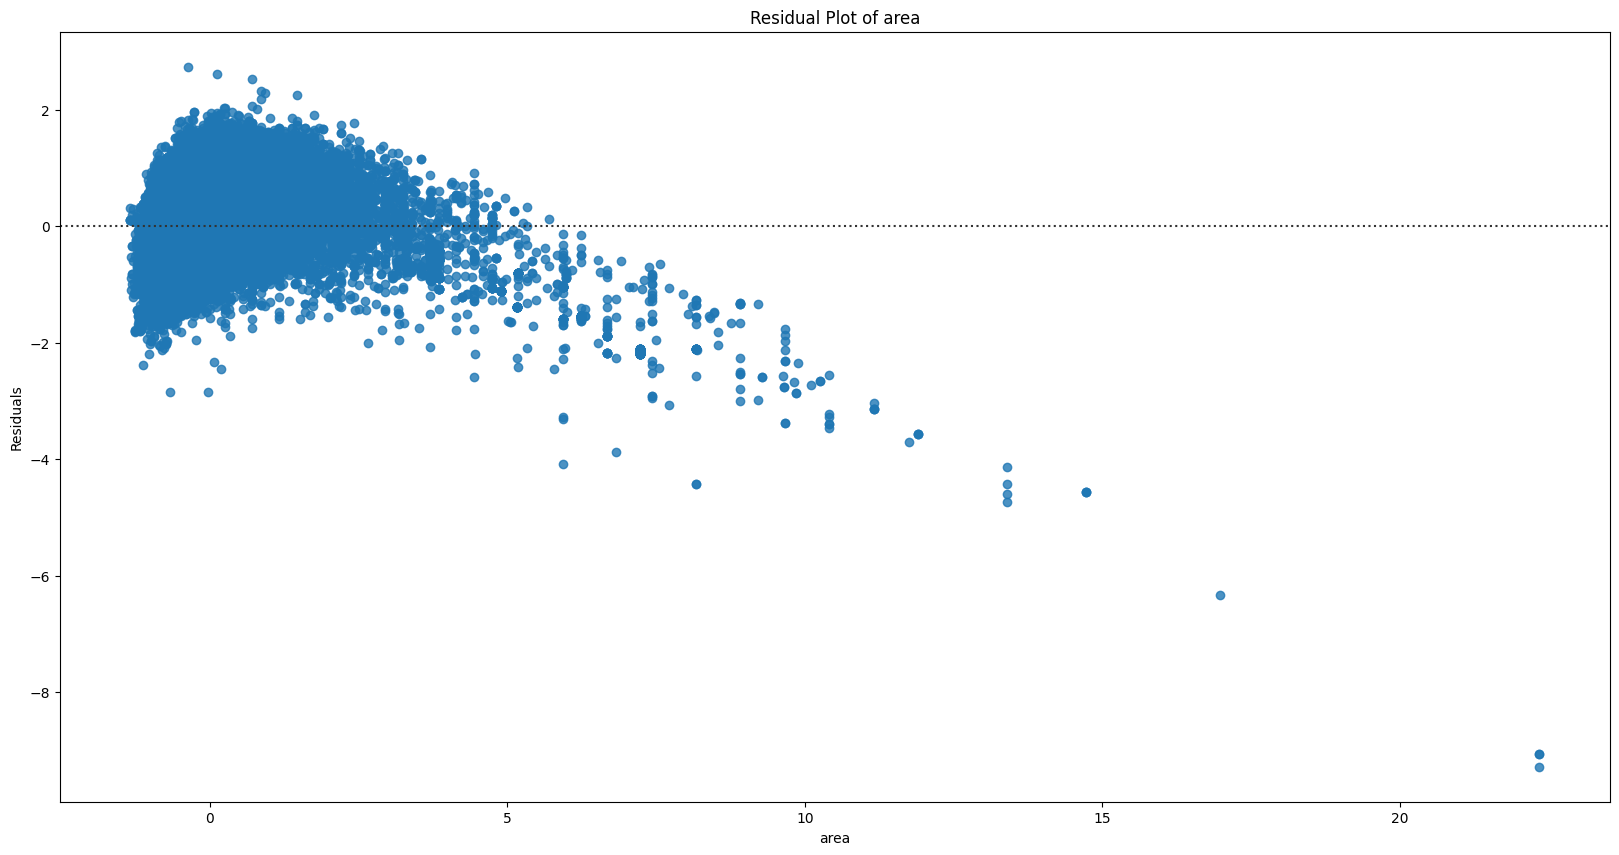

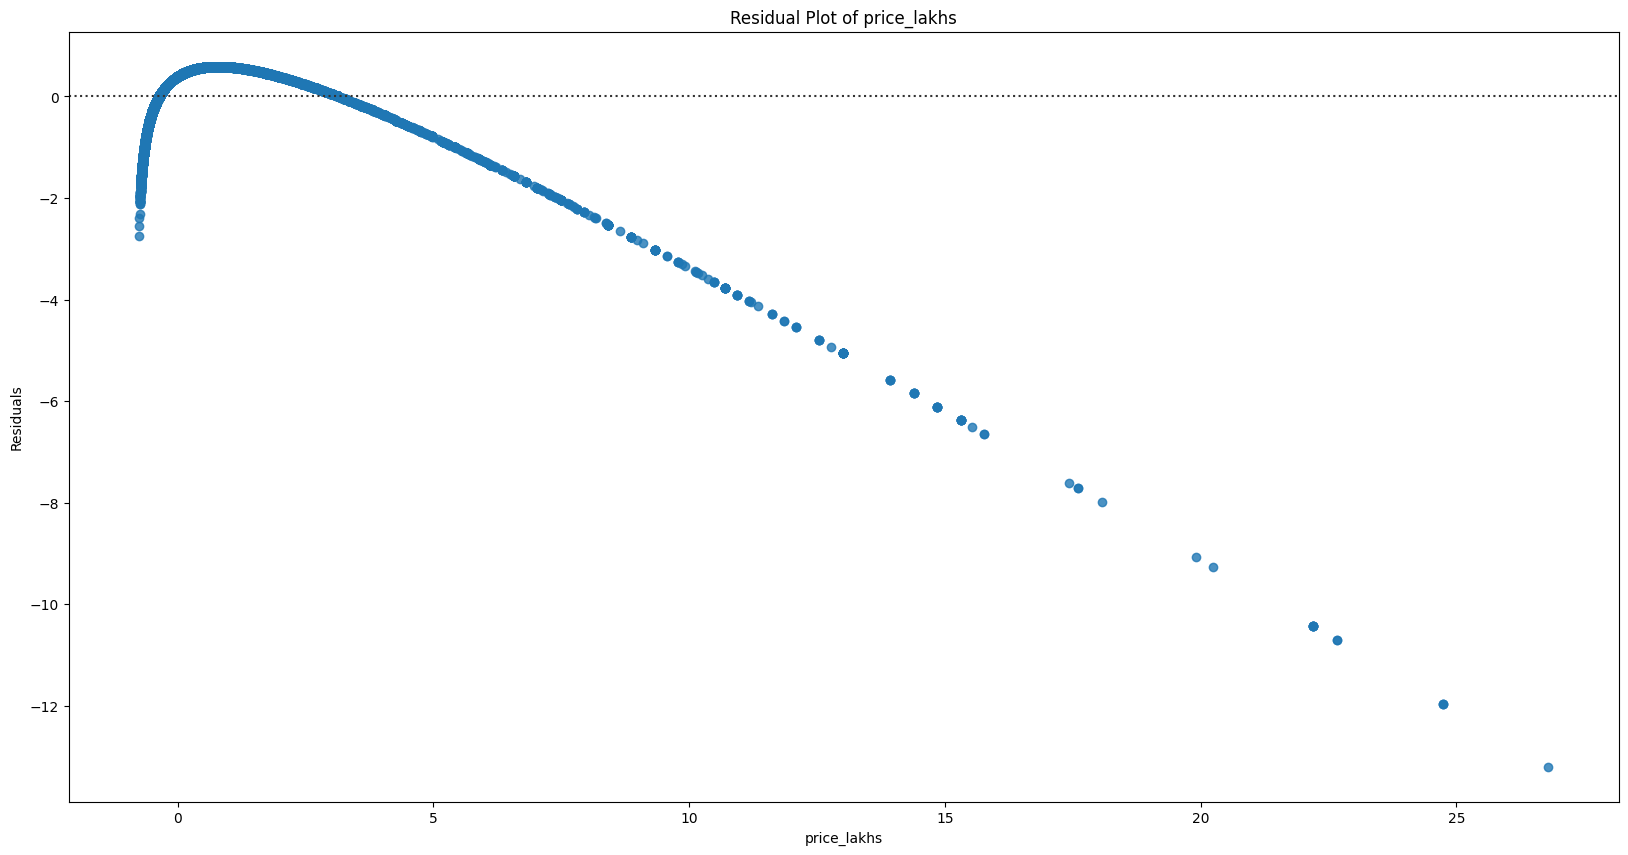

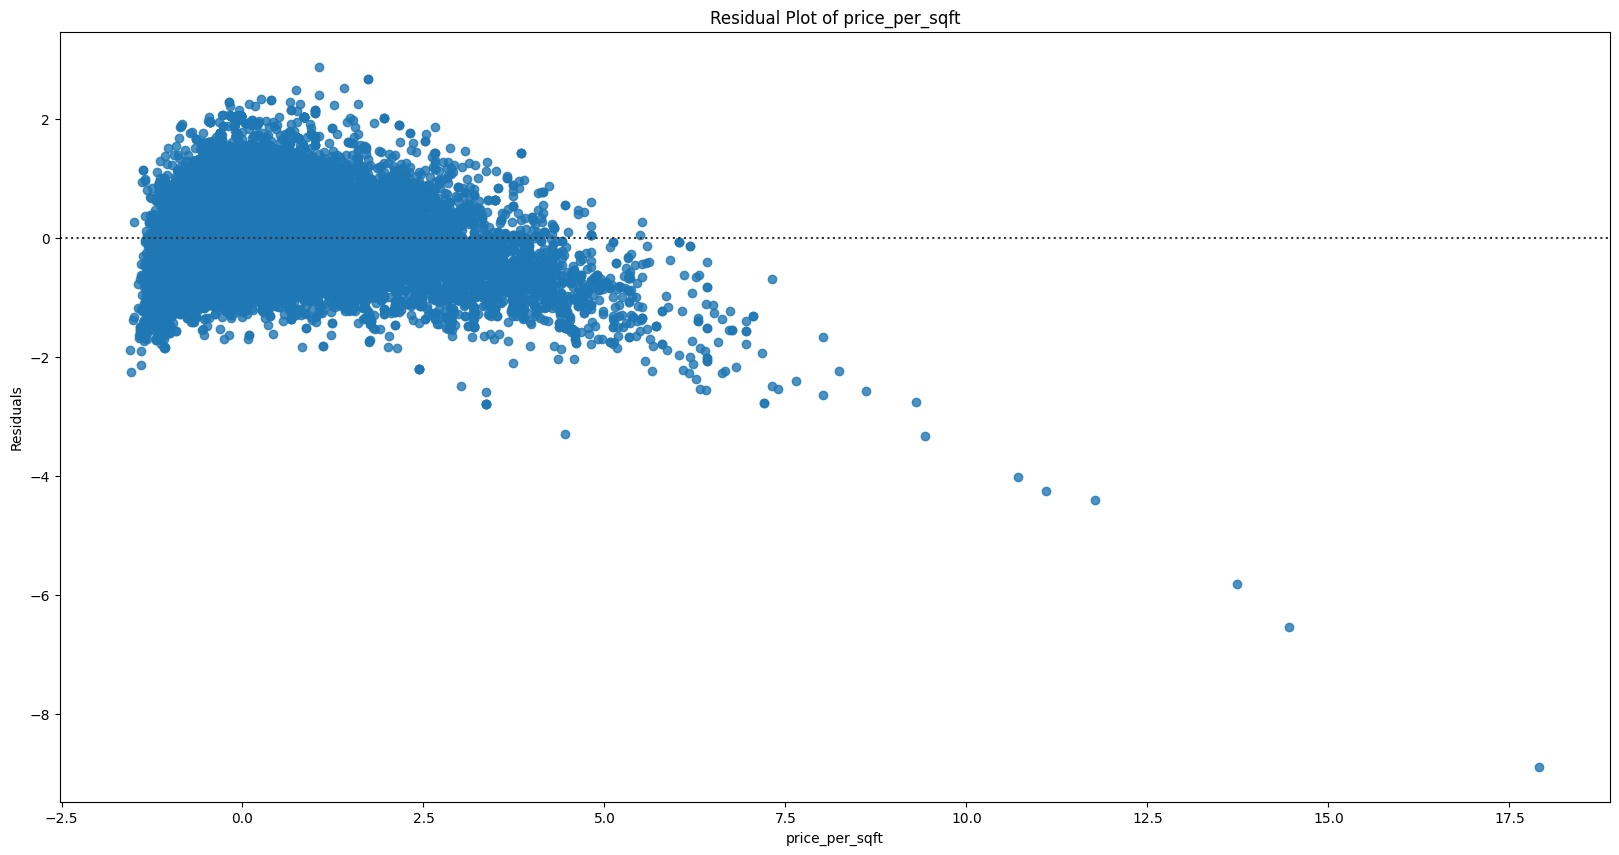

In [55]:
for feature in numerical_features.columns:
    sns.residplot(data=df4, x=feature, y=log_transform_y)
    plt.title(f'Residual Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Residuals')
    plt.show()

In [56]:
skewed_feats = numerical_features.apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_feats

price_lakhs       7.273539
area              3.935689
price_per_sqft    1.933923
bhk               0.896282
dtype: float64

In [57]:
df_fix_skew = np.log1p(numerical_features)

In [58]:
skewed_feats = df_fix_skew.apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_feats

price_per_sqft    1.428820
area              0.528855
price_lakhs       0.316381
bhk               0.191634
dtype: float64

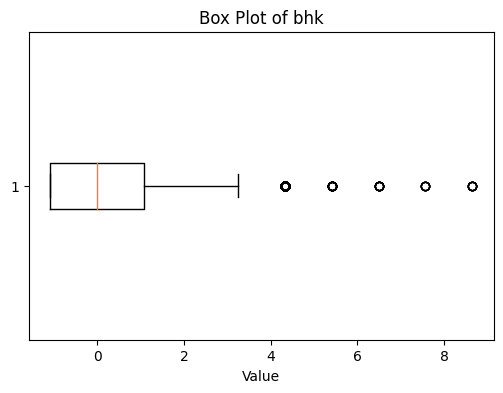

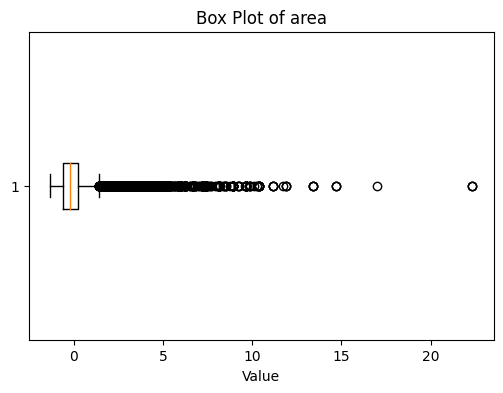

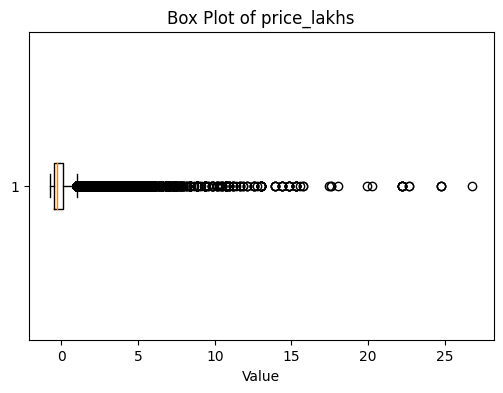

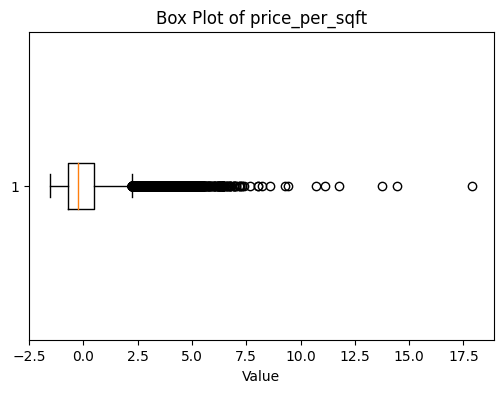

In [59]:
for i, column in enumerate(df_fix_skew.columns):
    plt.figure(figsize=(6, 4))
    plt.boxplot(df4[column], vert=False, boxprops=dict())
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Value')
    plt.show()

In [60]:
scaler = StandardScaler()

standardized_features = scaler.fit_transform(df_fix_skew)

std_df4 = pd.DataFrame(standardized_features, columns=numerical_features.columns)
std_df4.head()

,bhk,area,price_lakhs,price_per_sqft
0,1.105119,-0.526001,0.933878,2.270030
1,0.132993,-0.661571,-0.920764,-0.771414
2,0.132993,-0.757347,0.494215,1.465336
3,0.132993,-0.035198,-0.763957,-0.936748
4,0.132993,-0.603205,-0.230588,-0.056032


In [61]:
std_df4.corr()

,bhk,area,price_lakhs,price_per_sqft
bhk,1.000000,0.825620,0.761177,0.367659
area,0.825620,1.000000,0.732071,0.192872
price_lakhs,0.761177,0.732071,1.000000,0.772911
price_per_sqft,0.367659,0.192872,0.772911,1.000000


In [62]:
df5 = pd.concat([df4, categorical_features], axis=1)
df5.head()

,bhk,area,price_lakhs,price_per_sqft,region
0,1.067343,-0.506566,0.374808,2.290572,Andheri West
1,-0.016376,-0.573703,-0.532508,-0.740838,Naigaon East
2,-0.016376,-0.618461,0.021052,1.418844,Borivali West
3,-0.016376,-0.221607,-0.498189,-0.886309,Panvel
4,-0.016376,-0.545356,-0.341387,-0.089799,Mira Road East


In [63]:
df5.region = df5.region.apply(lambda x: x.strip())
location_stats = df5['region'].value_counts(ascending=False)
location_stats

Thane West         14868
Mira Road East      9902
Dombivali           3041
Kandivali East      2568
Kharghar            2362
                   ...  
Police Colony          1
GTB Nagar              1
Bandra                 1
Sector 14 Vashi        1
Goregaon               1
Name: region, Length: 228, dtype: int64

In [64]:
location_stats.values.sum()

76038

In [65]:
len(location_stats[location_stats>10])

114

In [66]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Kanjurmarg East      10
Vasind               10
Sector 20 Kamothe    10
Koproli              10
Cuffe Parade          9
                     ..
Police Colony         1
GTB Nagar             1
Bandra                1
Sector 14 Vashi       1
Goregaon              1
Name: region, Length: 114, dtype: int64

In [67]:
len(df5.region.unique())

228

In [69]:
df5.region = df5.region.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.region.unique())


115

In [70]:
df5.region.value_counts()

Thane West           14868
Mira Road East        9902
Dombivali             3041
Kandivali East        2568
Kharghar              2362
                     ...  
Sector 21 Kamothe       16
Kalwa                   15
Nalasopara East         15
Vangani                 13
Saphale                 12
Name: region, Length: 115, dtype: int64

In [71]:
target_col = 'price_lakhs'
df5 = df5[[col for col in df5.columns if col != target_col] + [target_col]]
df5.head()

,bhk,area,price_per_sqft,region,price_lakhs
0,1.067343,-0.506566,2.290572,Andheri West,0.374808
1,-0.016376,-0.573703,-0.740838,Naigaon East,-0.532508
2,-0.016376,-0.618461,1.418844,Borivali West,0.021052
3,-0.016376,-0.221607,-0.886309,Panvel,-0.498189
4,-0.016376,-0.545356,-0.089799,Mira Road East,-0.341387


In [73]:
df5 = df5.copy()
if 'type' in df5.columns:
    df5 = pd.get_dummies(df5, columns=['type'], prefix=['type'])
    
df5.head()


,bhk,area,price_per_sqft,region,price_lakhs
0,1.067343,-0.506566,2.290572,Andheri West,0.374808
1,-0.016376,-0.573703,-0.740838,Naigaon East,-0.532508
2,-0.016376,-0.618461,1.418844,Borivali West,0.021052
3,-0.016376,-0.221607,-0.886309,Panvel,-0.498189
4,-0.016376,-0.545356,-0.089799,Mira Road East,-0.341387


In [74]:
df_encoded = pd.get_dummies(df5, columns=['region'], prefix=['region'])

In [75]:
df_encoded.head()

,bhk,area,price_per_sqft,price_lakhs,region_Agripada,region_Airoli,region_Ambarnath,region_Ambernath East,region_Ambernath West,region_Andheri East,...,region_Vasai,region_Vashi,region_Vikhroli,region_Ville Parle East,region_Ville Parle West,region_Virar,region_Virar West,region_Wadala,region_Worli,region_other
0,1.067343,-0.506566,2.290572,0.374808,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.016376,-0.573703,-0.740838,-0.532508,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.016376,-0.618461,1.418844,0.021052,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.016376,-0.221607,-0.886309,-0.498189,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.016376,-0.545356,-0.089799,-0.341387,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df_encoded.shape

(76038, 119)

In [78]:
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('price_lakhs', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
X = df_encoded.drop('price_lakhs', axis=1)
y = log_transform_y

In [80]:
X

,bhk,area,price_per_sqft,region_Agripada,region_Airoli,region_Ambarnath,region_Ambernath East,region_Ambernath West,region_Andheri East,region_Andheri West,...,region_Vasai,region_Vashi,region_Vikhroli,region_Ville Parle East,region_Ville Parle West,region_Virar,region_Virar West,region_Wadala,region_Worli,region_other
0,1.067343,-0.506566,2.290572,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,-0.016376,-0.573703,-0.740838,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.016376,-0.618461,1.418844,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.016376,-0.221607,-0.886309,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.016376,-0.545356,-0.089799,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76033,1.067343,0.749641,3.291893,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76034,3.234782,3.020362,2.597104,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76035,2.151063,3.414232,1.614226,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76036,-0.016376,0.418432,1.869553,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# Add a constant to the X_scaled matrix for intercept term
X_scaled = sm.add_constant(X)

model = sm.OLS(y, X_scaled).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            price_lakhs   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 1.072e+04
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:45:46   Log-Likelihood:                 14019.
No. Observations:               76038   AIC:                        -2.780e+04
Df Residuals:                   75920   BIC:                        -2.671e+04
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             